# Diwali Sales Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset
data = pd.read_csv('Diwali Sales Data.csv')

In [3]:
data.shape

(11251, 15)

In [4]:
data.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# Drop unrelated/blank columns
data.drop(['Status','unnamed1'], axis=1, inplace=True)

In [7]:
# check for null values
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# drop null values
data.dropna(inplace=True)

In [9]:
# change datatypes
data['Amount'] = data['Amount'].astype('int')

In [14]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shaadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

In [13]:
# rename column
data.rename(columns={'Marital_Status':'Shaadi'},inplace=True)

In [15]:
data.describe()

,User_ID,Age,Shaadi,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [16]:
data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

> Gender

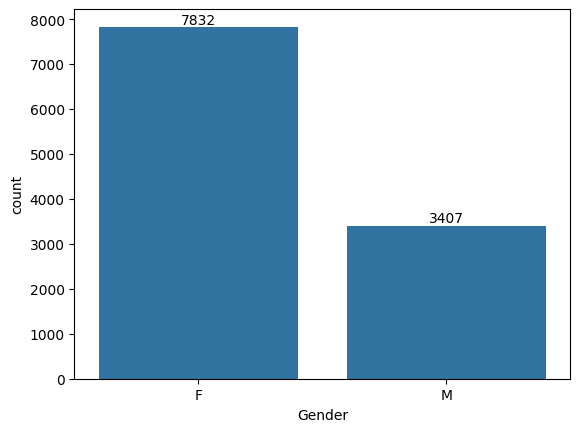

In [23]:
ax = sns.countplot(x = 'Gender', data=data)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

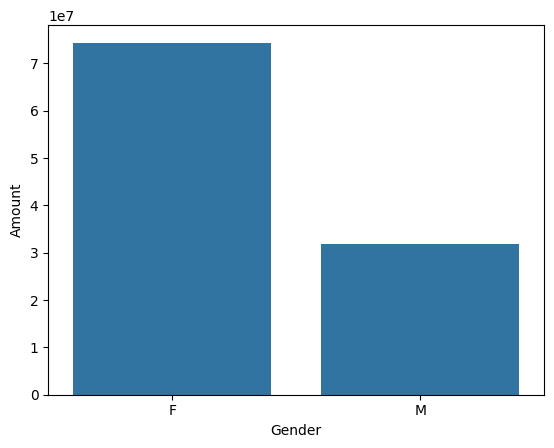

In [27]:
sales_gen = data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender', y='Amount', data=sales_gen)

> From above graphs, we can see that most of the `buyers` are `female` and even the purchasing power of `women` are `greater` than men

> Age

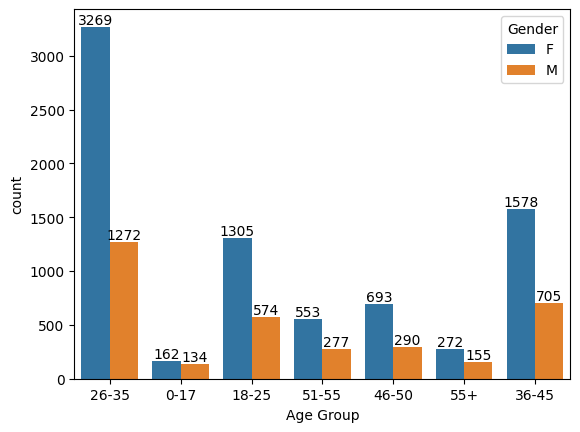

In [28]:
ax = sns.countplot(data=data, x='Age Group', hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

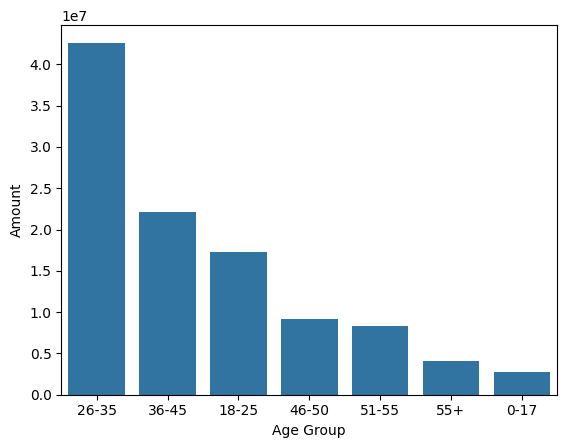

In [30]:
# Total Amount vs Age Group
sales_age = data.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group', y='Amount', data=sales_age)

> From above graphs, we can see that most of the buyers are of age group 26-35 years females.

> State

<Axes: xlabel='State', ylabel='Orders'>

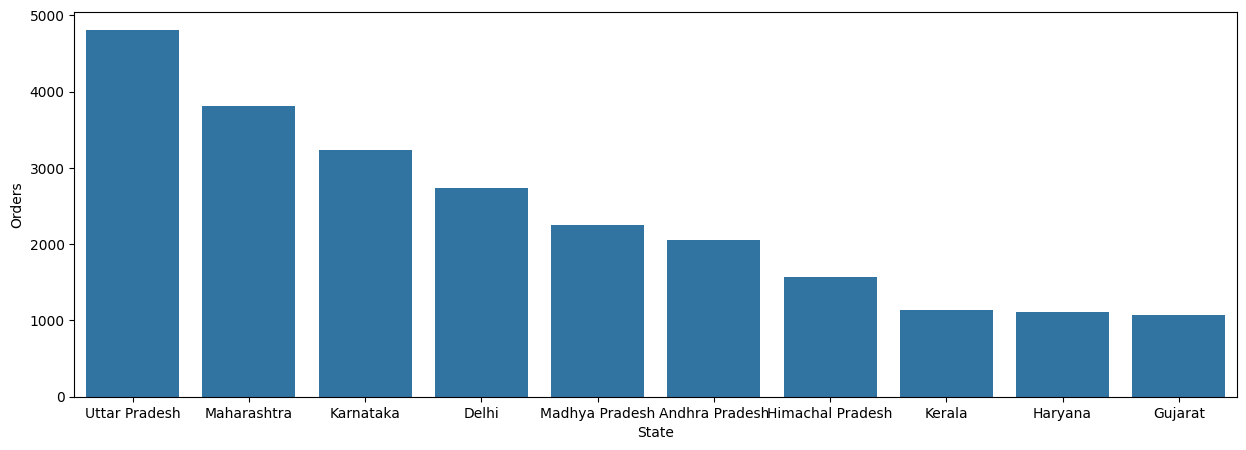

In [34]:
# total number of orders from top 10 states
sales_state = data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
#sns.set(rc={'figure.figsize'=(15,5)})
plt.figure(figsize=(15,5))
sns.barplot(x='State', y='Orders', data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

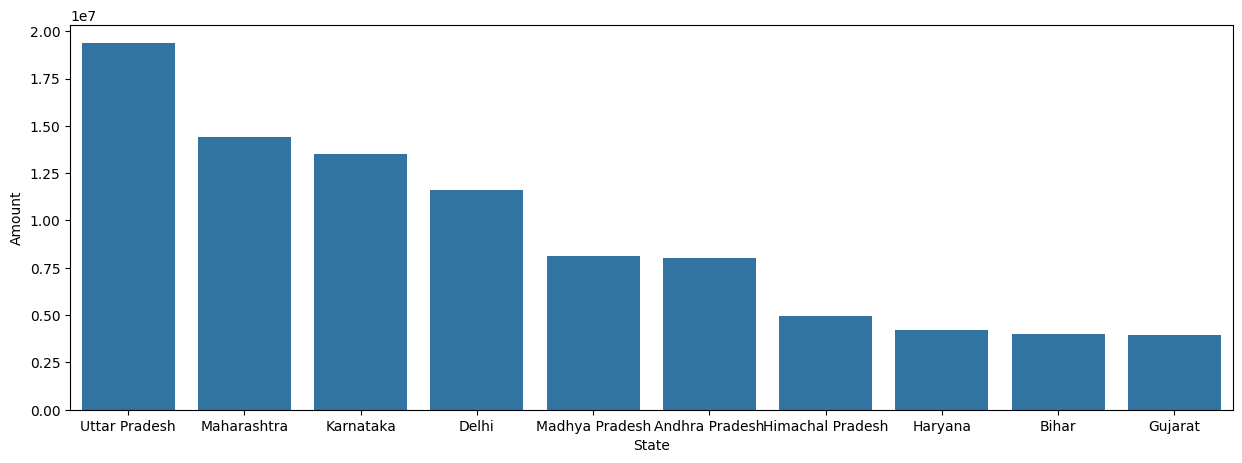

In [36]:
# total amount/sales from top 10 state
sales_state = data.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(data=sales_state, x='State',y='Amount')

> From above graph, we can see that most of the orders and sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.

> Marital Status

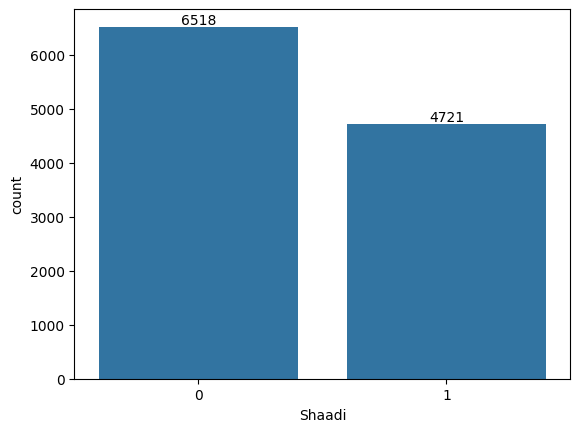

<Figure size 700x500 with 0 Axes>

In [40]:
ax = sns.countplot(data=data, x='Shaadi')
plt.figure(figsize=(7,5))
for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Shaadi', ylabel='Amount'>

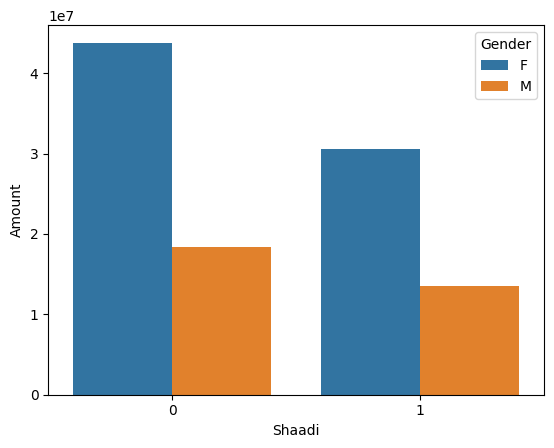

In [53]:
sales_state = data.groupby(['Shaadi','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=sales_state, x='Shaadi', y='Amount', hue='Gender')

> From above graph, we can see that most of the buyers are married (women) and they have high purchasing power.

> Occupation

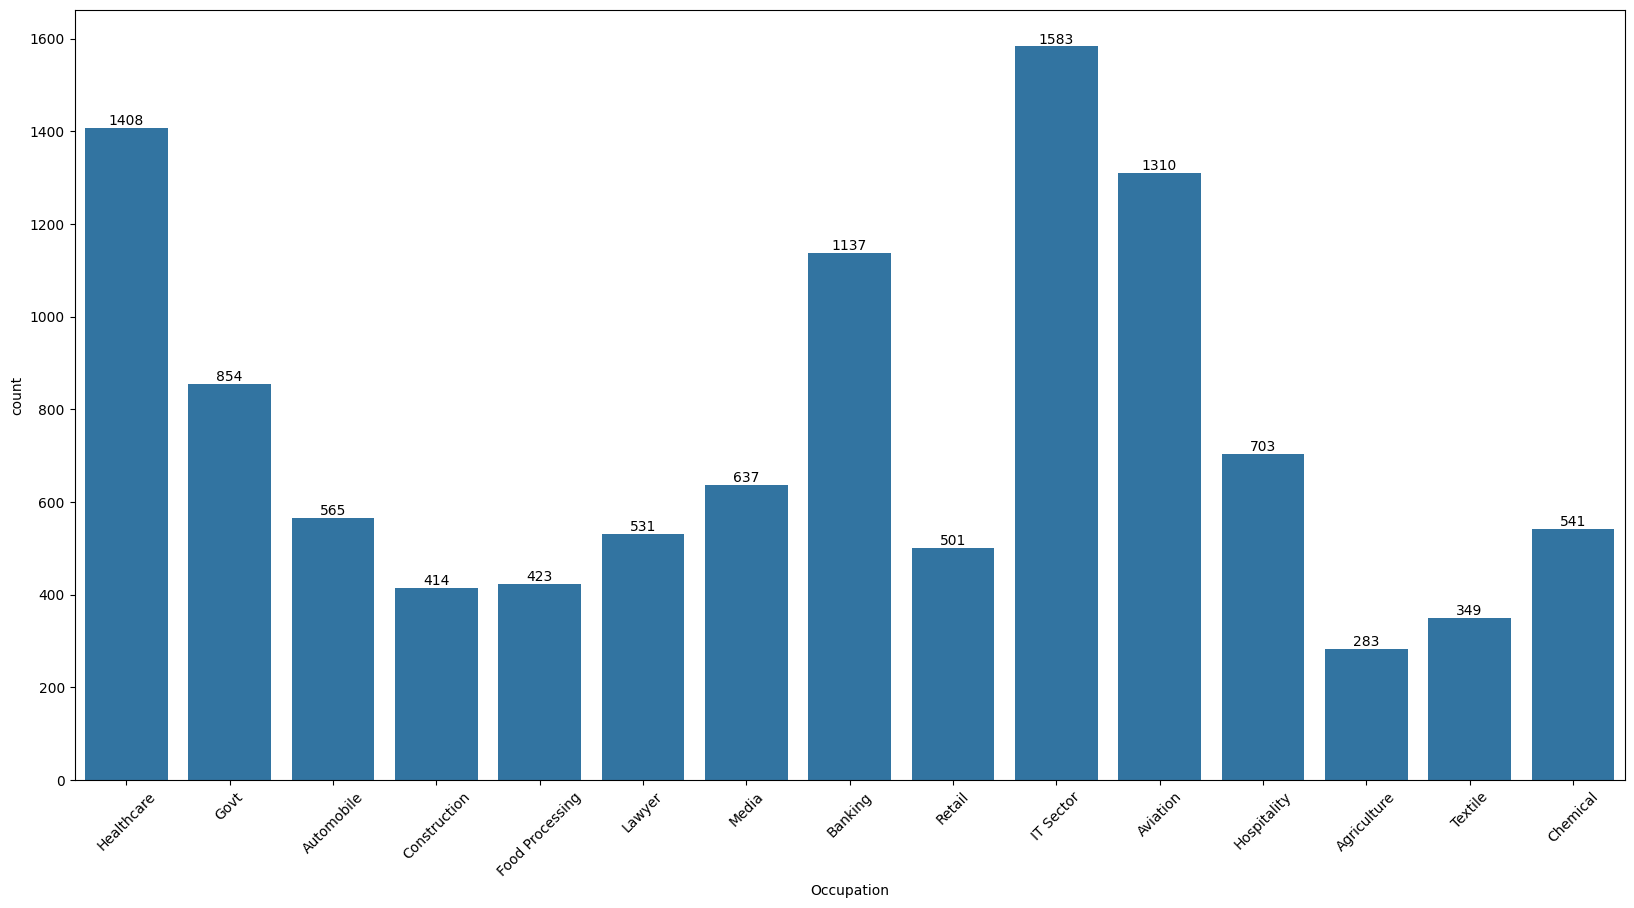

In [63]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
ax = sns.countplot(data=data, x='Occupation')
for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Occupation', ylabel='Amount'>

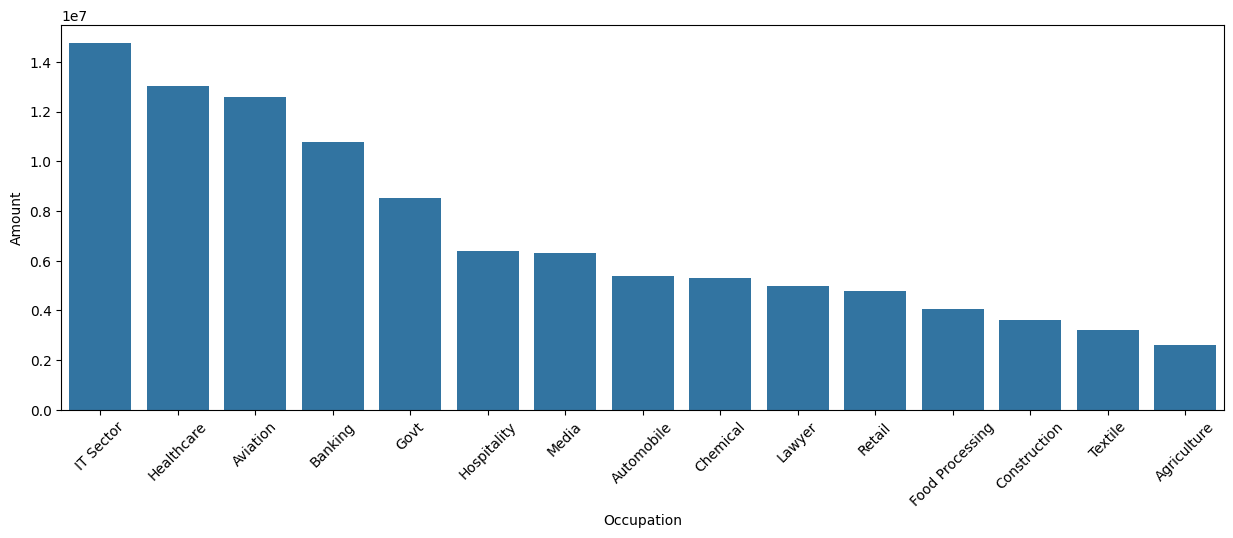

In [61]:
sales_state = data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(data=sales_state, x='Occupation', y='Amount')

> From above graph, we can see that most of the buyers are from IT Sector, Healthcare and Aviation sector.

> Product Category

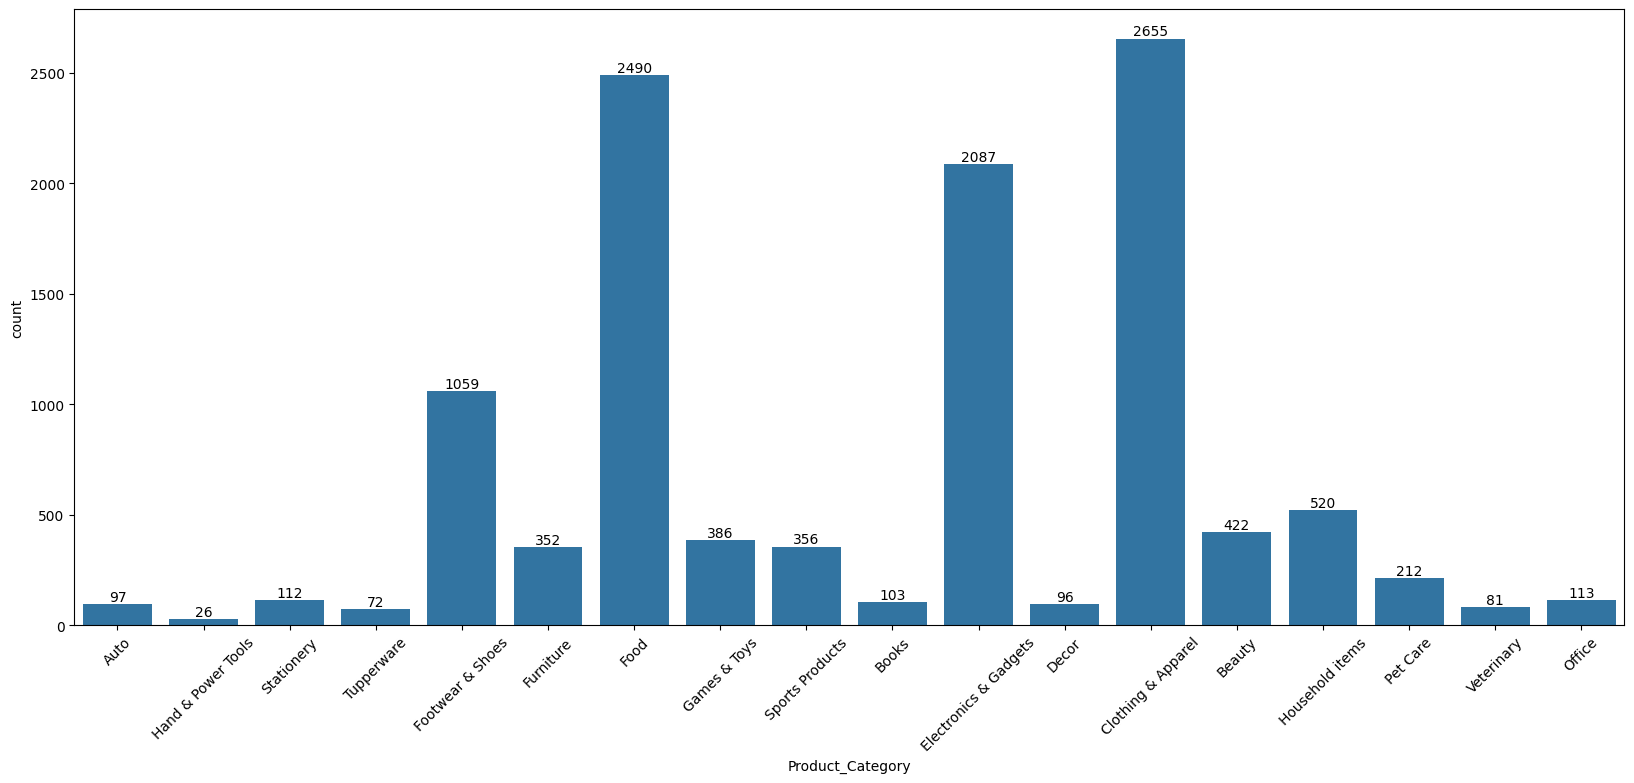

In [70]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
ax = sns.countplot(data=data, x='Product_Category')
for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Product_Category', ylabel='Amount'>

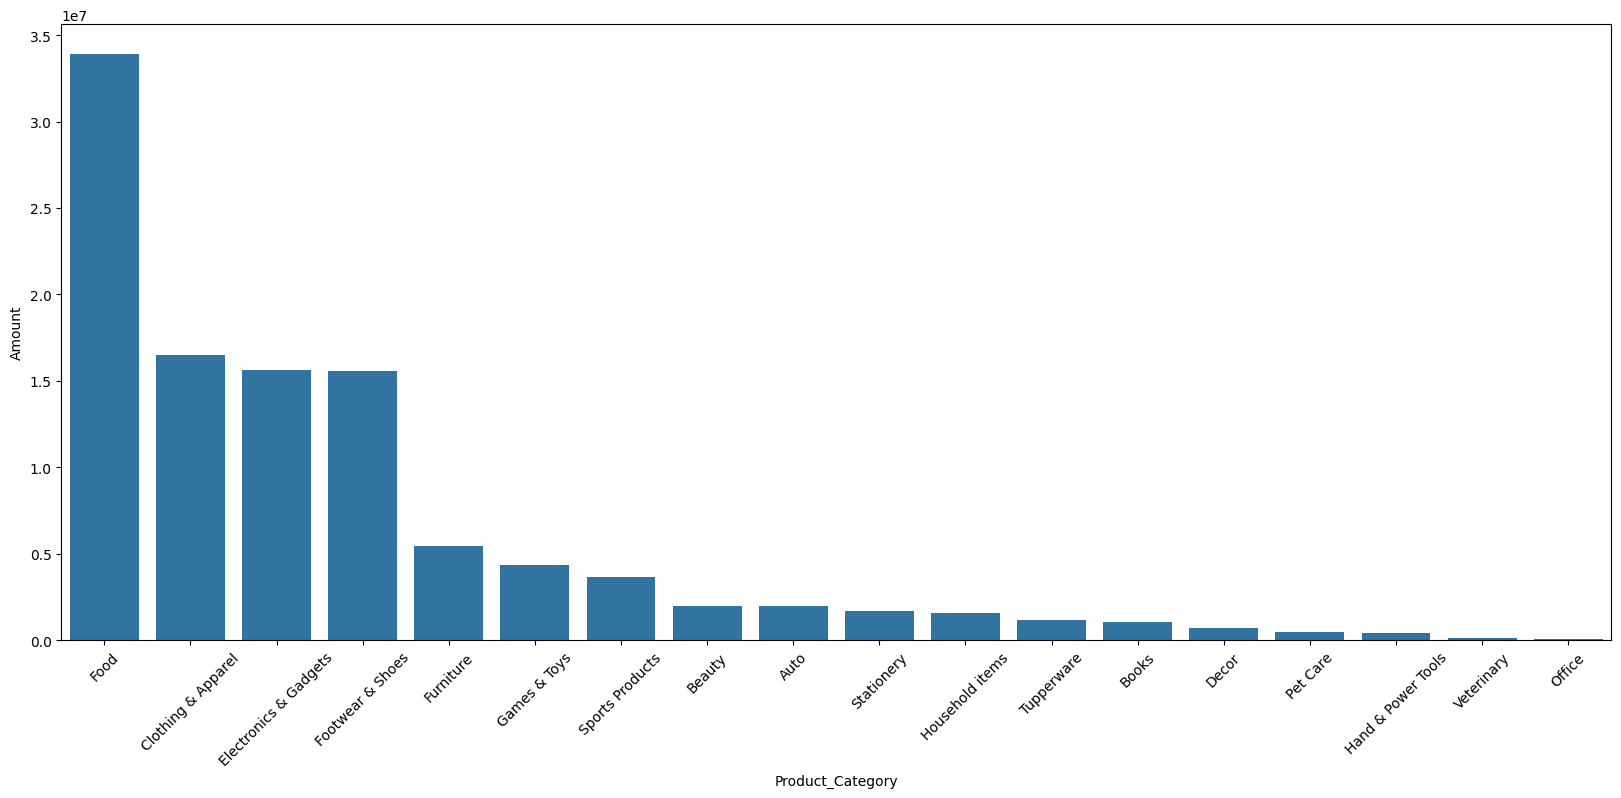

In [78]:
sales_state = data.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
sns.barplot(data=sales_state, x='Product_Category', y='Amount')

From above graph, we can see that sold products are from Food, Clothing & Apparel and Electronics & Gadgets category.

---
### Conclusion:
> Married women age group 26-35 yrs from UP, Maharashtra and 
Karnataka working in IT, Healthcare and Aviation are more likely to buy products from food, clothing and electronics gadgets.
---

> Thank You!